## Category CNN Using Keras and Fashion-MNIST Image Database


This notebook demonstrates a proof of concept for my first convolutional neural network which will classify fashion images by category (e.g. Trousers, Blouse, Dress etc). In this dataset, which is built into the Keras library, there are ten possible outputs. They are;
- 1) Top/T_shirt
- 2) Trousers
- 3) Pullover
- 4) Dress
- 5) Coat
- 6) Sandal
- 7) Shirt 
- 8) Trainer
- 9) Bag
- 10) Ankle Boots


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test_and_val, y_test_and_val)=fashion_mnist.load_data()
# 
#     # reshape dataset to have a single channel
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# X_val = X_train.reshape((X_train.shape[0], 28, 28, 1))



In [3]:
y_test_and_val

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [4]:
print(X_train.shape)
print(X_test_and_val.shape)
print(y_train.shape)
print(y_test_and_val.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size=0.4)

In [18]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(6000, 28, 28, 1)
(4000, 28, 28, 1)
(6000, 10)
(4000, 10)


In [7]:
y_test_and_val

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_and_val = X_test_and_val.reshape((X_test_and_val.shape[0], 28, 28, 1))

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
y_test_and_val = to_categorical(y_test_and_val)

In [11]:
y_train.shape

(60000, 10)

In [12]:
X_train_norm = X_train/255
X_test_norm= X_test/255
X_val_norm = X_val/255
X_test_and_val_norm = X_test_and_val/255 
    
X_train_norm = X_train_norm.astype('float32')
X_test_norm = X_train_norm.astype('float32')
X_val_norm = X_train_norm.astype('float32')
X_test_and_val_norm = X_test_and_val_norm.astype('float32')

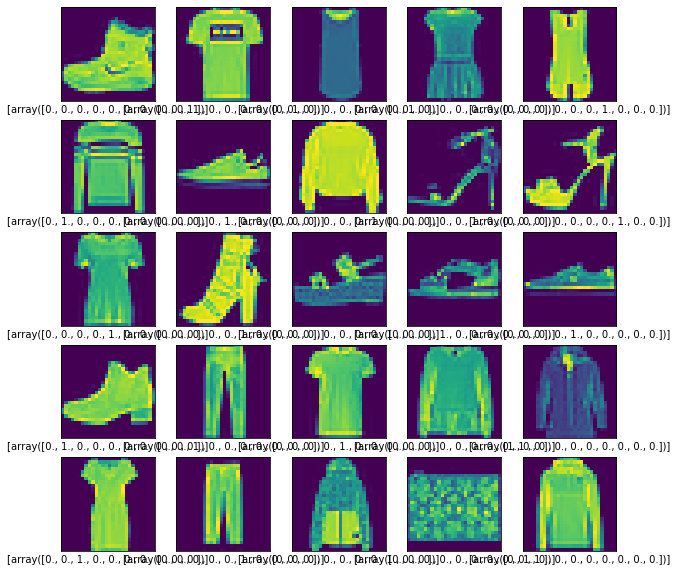

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(X_train[i]))
    plt.xlabel([y_test_and_val[i]])
plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
          optimizer=tensorflow.keras.optimizers.Adadelta(),
          metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val,y_val))

Train on 60000 samples, validate on 6000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 328us/sample - loss: 8.7423 - acc: 0.4216 - val_loss: 3.3793 - val_acc: 0.6202
Epoch 2/30
60000/60000 [==============================] - 19s 325us/sample - loss: 2.8118 - acc: 0.6635 - val_loss: 2.4073 - val_acc: 0.6905
Epoch 3/30
60000/60000 [==============================] - 20s 326us/sample - loss: 2.1729 - acc: 0.7108 - val_loss: 2.0277 - val_acc: 0.7230
Epoch 4/30
60000/60000 [==============================] - 20s 326us/sample - loss: 1.8637 - acc: 0.7355 - val_loss: 1.8113 - val_acc: 0.7428
Epoch 5/30
60000/60000 [==============================] - 20s 326us/sample - loss: 1.6725 - acc: 0.7523 - val_loss: 1.6493 - val_acc: 0.7565
Epoch 6/30
60000/60000 [==============================] - 20s 326us/sample - loss: 1.5363 - acc: 0.7646 - val_loss: 1.5505 - val_acc: 0.7630
Epoch 7/30
60000/60000 [==============================] - 20s 327us/sample - loss: 1.4315 - acc: 0.7726 -

In [22]:
model.evaluate(X_test,  y_test, verbose=2)

# print('\nTest accuracy:', test_acc)

4000/4000 - 0s - loss: 0.8822 - acc: 0.8120


[0.8821568293571472, 0.812]

In [ ]:
# plt.plot(history.history.history['loss'])
# plt.plot(history.history.history['test_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

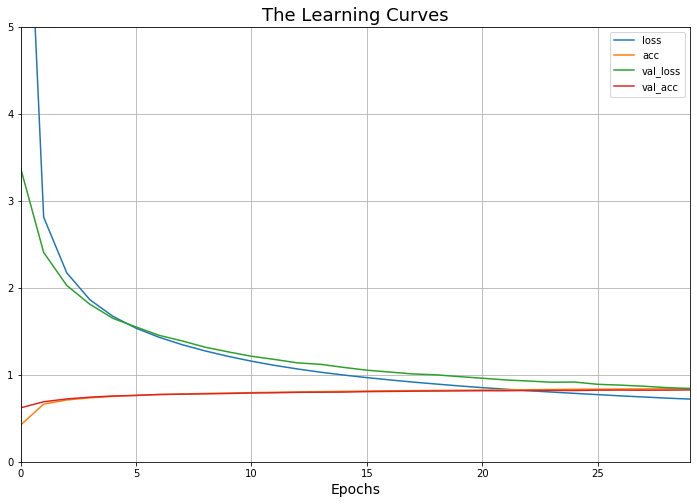

In [24]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,5) # set the vertical range to [0,1]
plt.title("The Learning Curves", fontsize=18)
plt.xlabel("Epochs", fontsize=14)
plt.show()

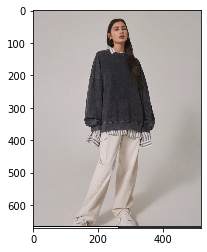

In [26]:
data = image.imread('cat-pic-test.png')

plt.imshow(data)
plt.show()

In [30]:
from PIL import Image
import numpy as np
color_img = np.asarray(Image.open('cat-pic-test.png')) / 255

In [47]:
img = numpy.mean(color_img, axis=2)

In [48]:
img.shape

(670, 516)

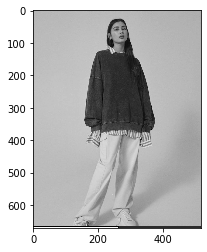

In [52]:
img_grey = plt.imshow(img, cmap=plt.cm.gray)
plt.show(img_grey)

In [60]:
img = 'cat-pic-test.png'.resize((28, 28), Image.ANTIALIAS)
# size_img = img_grey.resize((28,28))

AttributeError: 'str' object has no attribute 'resize'

In [62]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
# load and prepare the image
img = load_img('cat-pic-test.png', grayscale=True, target_size=(28, 28))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

In [64]:
result = model.predict_classes(img)
result

array([2])

In [67]:
# import matplotlib.pyplot as plt

# from skimage import data
# from skimage.color import rgb2gray

# #original = Image.open('cat-pic-test.png')
# grayscale = rgb2gray('cat-pic-test.png')

# fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# ax = axes.ravel()

# ax[0].imshow(original)
# ax[0].set_title("Original")
# ax[1].imshow(grayscale, cmap=plt.cm.gray)
# ax[1].set_title("Grayscale")

# fig.tight_layout()
# plt.show()

In [ ]:
# model2 = Sequential()
# model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model2.add(MaxPooling2D((2, 2)))
# model2.add(Flatten())
# model2.add(Dense(100, activation='relu'))
# model2.add(Dense(10, activatio
#bbbn='softmax'))

In [ ]:
# model2.compile(optimizer='adam',
#               loss=tensorflow.keras.losses.SparseCategoricalCrossentropy,
#               metrics=['accuracy'])

In [ ]:
# model2.fit(X_train, y_train,
#       epochs=10,
#       verbose=1)

In [ ]:
# test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)

# print('\nTest accuracy:', test_acc)